In [2]:
# 정규방정식

# 선형처럼 보이는 데이터 생성
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
# numpy의 선형대수 모듈 (np.linalg)에 있는 inv() 함수를 사용해 역행렬 계산
# dot() 메소드를 이용해 행렬 계산
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.6493906 ],
       [3.28277927]])

In [4]:
# Theta Hat을 사용해 예측하기
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.6493906 ],
       [10.21494914]])

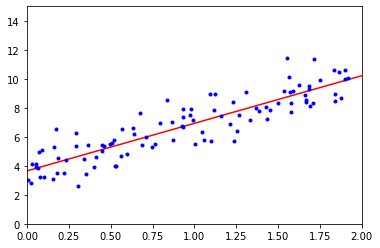

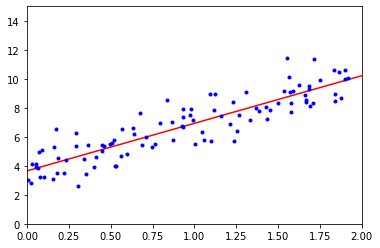

In [5]:
# 모델 예측 그래프로 나타내기
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show(0)

In [6]:
# Sklearn에서 선형 회귀 수행
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[3.6493906] [[3.28277927]]
[[ 3.6493906 ]
 [10.21494914]]


In [7]:
# LinearRegression 클래스의 기반 함수 호출하기
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.6493906 ],
       [3.28277927]])

In [8]:
# 유사역행렬 직접 구하기
np.linalg.pinv(X_b).dot(y)

array([[3.6493906 ],
       [3.28277927]])

In [9]:
# 배치 경사 하강법
# 매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해 계산함
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[3.6493906 ],
       [3.28277927]])

In [11]:
# 확률적 경사 하강법
# 매 스탭에서 한 개의 샘플을 무작위로 선택하고 그 하나에 샘플에 대한 그레이디언트 계산

n_epoches = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # 무작위 초기화

for epoch in range(n_epoches):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
theta

array([[3.67088219],
       [3.27854057]])

In [12]:
# Sklearn에서 SGD 방식으로 선형 회귀 사용
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.63102542]), array([3.2869456]))

In [13]:
# 미니배치 경사 하강법
# 각 스텝에서 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레디이디언트 계산
# 주요 장점 : 행렬 연산에 최적화된 하드웨어 (특히 GPU)를 사용해서 얻는 성능 향상

In [15]:
# 다항 회귀
# 비선형 데이터를 학습하기 위해 선형 모델을 사용할 수 있음
# 각 특성의 거듭제곱을 새로운 특성으로 추가하고 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것

# 2차방정식으로 비선형 데이터 생성 (잡음 포함)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [20]:
# Sklearn의 PolynominalFeatures를 사용해 훈련 데이터 변환
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-1.61259703]), array([-1.61259703,  2.6004692 ]))

In [21]:
# X_poly에서는 원래 특성 X와 이 특성의 제곱을 포함
# 이 훈련 데이터에 LinearRegression 적용
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.09565735]), array([[0.98945998, 0.53489381]]))

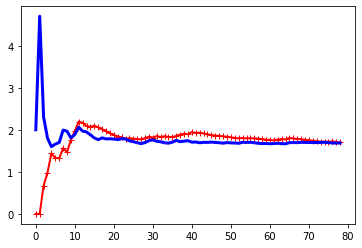

In [27]:
# 학습 곡선
# 훈련 세트의 검증 세트의 모델 성능을 훈련 세트 크기 (또는 훈련 반복)의 함수로 나타냄
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련 세트")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

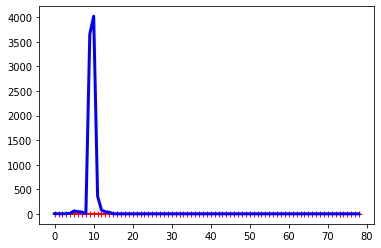

In [28]:
# 10차 다항 회귀 모델의 학습 곡선
from sklearn.pipeline import Pipeline

polynominal_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynominal_regression, X, y)

In [29]:
# 릿지 회귀
# 규제가 추가된 선형 회귀
# 비용 함수가 규제항에 추가됨
# l2 노름의 제곱을 2로 나눈 규제항 사용 
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.30071959]])

In [30]:
# 라쏘 회귀
# 선형 회귀의 또 다른 규제 버전
# 가중치 벡터의 l1 노름 사용
# Lasso 대신 SGDRegression에 penalty="l1" 옵션을 사용할 수도 있음
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.25647378])

In [31]:
# 엘라스틱넷
# 릿지 회귀와 라쏘 회귀를 절충한 모델
# 규제항 -> 릿지와 회귀의 규제항을 단순히 더해서 사용
# 혼합 정도는 혼합 비율 r을 사용해 조절 (r=0 -> 릿지 회귀와 동일 / r=1 -> 라쏘 회귀와 동일)
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.25762845])

In [ ]:
# 조기 종료
# 경사 하강법과 같은 반복적인 학습 알고리즘을 규제하는 방법
# 검증 에러가 최솟값에 도달하면 훈련을 바로 중지함
from sklearn.preprocessing import StandardScaler
from copy import deepcopy

## 기본 구현 코드 (작동 바로 안됨)
# 데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# warm_start=True -> fit() 메서드가 호출될 때 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련을 이어감
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_eror(y_val, y_val_predict)
    if val_error < minimum_val_error:
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

In [37]:
# 로지스틱 회귀
# 샘플이 특정 클래스에 속할 확률을 추정하는데 널리 사용

# 꽃잎 너비 기반 Iris-virginica 종 감지 분류기
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:, 3:] # 꽃잎의 너비
y= (iris["target"] == 2).astype(np.int32) # Iris-Vergininica면 1, 그렇지 않으면 0

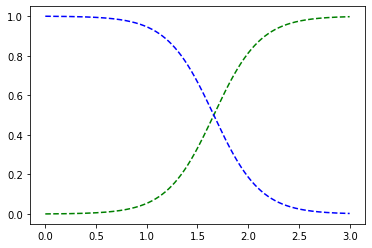

In [39]:
# 모델 훈련
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

# 너비가 0~3cm인 꽃에 대해 모델의 추정 확률 계산
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g--", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

In [40]:
# 예측 테스트
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [43]:
# 소프트맥스 회귀 (다항 로지스틱 회귀)
# 여러개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화
X = iris["data"][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

softmax_reg.predict([[5, 2]]), softmax_reg.predict_proba([[5, 2]])

(array([2]), array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]]))